# Importing Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2024-05-03 17:15:45.256147: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 17:15:45.256271: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 17:15:45.411192: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Pre-Processing

## Training Image Pre-Processing


In [2]:
training_set = keras.utils.image_dataset_from_directory(
    '/kaggle/input/fruit-and-vegetable-image-recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 3115 files belonging to 36 classes.


## Validtion Image Pre-Processing

In [3]:
validation_set = keras.utils.image_dataset_from_directory(
    '/kaggle/input/fruit-and-vegetable-image-recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 351 files belonging to 36 classes.


# Building Model

In [4]:
cnn = tf.keras.models.Sequential()

# Building Convulation layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
# cnn.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128))

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5))

# Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) 

# Compiling and Training Phase 

In [14]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,656,772 (6.32 MB)

 Trainable params: 1,656,772 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=32)


Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 86s 807ms/step - accuracy: 0.0218 - loss: 9.6334 - val_accuracy: 0.0342 - val_loss: 3.5834
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 127s 675ms/step - accuracy: 0.0344 - loss: 3.5823 - val_accuracy: 0.0484 - val_loss: 3.5753
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 663ms/step - accuracy: 0.0447 - loss: 3.5568 - val_accuracy: 0.0684 - val_loss: 3.3622
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 679ms/step - accuracy: 0.0473 - loss: 3.4420 - val_accuracy: 0.0741 - val_loss: 3.2428
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 674ms/step - accuracy: 0.0699 - loss: 3.3068 - val_accuracy: 0.0997 - val_loss: 3.1830
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 670ms/step - accuracy: 0.0741 - loss: 3.2511 - val_accuracy: 0.1225 - val_loss: 3.0188
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 668ms/step - accuracy: 0.0939 - loss: 3.1695 - val_accuracy: 0.2137 - val_loss: 2.8927
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 668ms/step - accuracy: 0.1125 - loss: 3.1061 - val_acc

In [17]:
cnn.save('trained_model.h5')

In [18]:
training_history.history

{'accuracy': [0.02792937308549881,
  0.03338683769106865,
  0.05008025839924812,
  0.0516853928565979,
  0.06420546025037766,
  0.07383627444505692,
  0.10369181632995605,
  0.12199036777019501,
  0.1672552227973938,
  0.19197431206703186,
  0.22568218410015106,
  0.26163724064826965,
  0.31107544898986816,
  0.3479935824871063,
  0.36436596512794495,
  0.40449437499046326,
  0.4199036955833435,
  0.47929373383522034,
  0.5030497312545776,
  0.48571428656578064,
  0.54221510887146,
  0.5479936003684998,
  0.5733547210693359,
  0.5704655051231384,
  0.5919743180274963,
  0.5887640714645386,
  0.6128410696983337,
  0.6439807415008545,
  0.6401284337043762,
  0.6693419218063354,
  0.6375601887702942,
  0.6523274183273315],
 'loss': [5.022613048553467,
  3.584329605102539,
  3.5421648025512695,
  3.4295411109924316,
  3.316546678543091,
  3.2477221488952637,
  3.1476447582244873,
  3.0998528003692627,
  2.94990611076355,
  2.8539083003997803,
  2.701192855834961,
  2.571969985961914,
  2.4

In [19]:
#recording history
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [20]:
print(training_history.history.keys)

<built-in method keys of dict object at 0x7934f00da140>


# Calculating Accuracy of Model Achieved on Validation Set

In [21]:
print("Validation Set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation Set Accuracy: 74.35897588729858 %


# Visualization Of Accuracy 

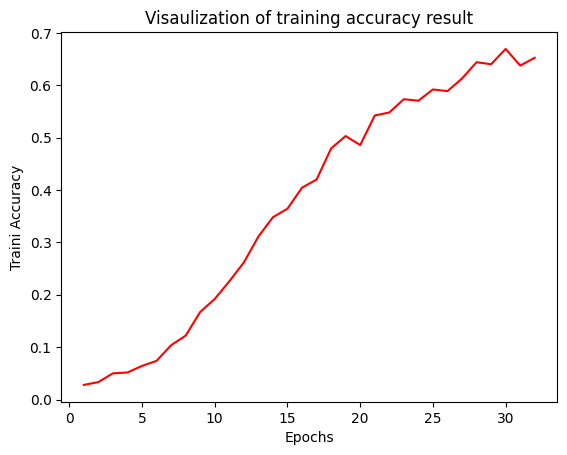

In [22]:
# training visualization
epochs =[i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Traini Accuracy')
plt.title('Visaulization of training accuracy result')
plt.show()

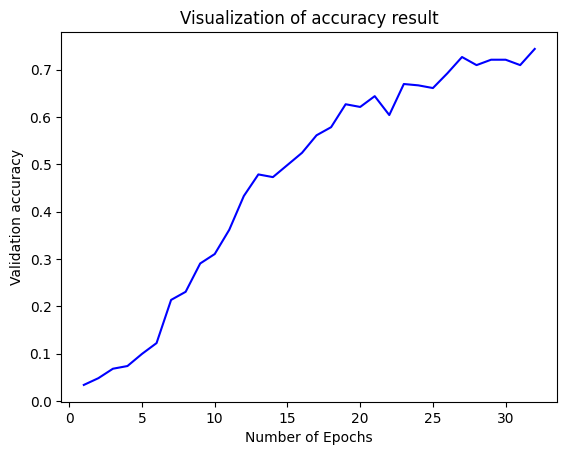

In [23]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation accuracy')
plt.title('Visualization of accuracy result')
plt.show()

# Evaluation Model

In [24]:
training_loss,training_accuracy = cnn.evaluate(training_set)

98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 480ms/step - accuracy: 0.6818 - loss: 1.1664


In [25]:
val_loss,val_accuracy = cnn.evaluate(validation_set)

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.7608 - loss: 0.9443


In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/fruit-and-vegetable-image-recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 359 files belonging to 36 classes.


In [27]:
test_loss,test_accuracy = cnn.evaluate(test_set)

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.7592 - loss: 0.9868
